In [2]:
#Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [6]:
# Step 2: Load the dataset
df = pd.read_csv("/content/World-happiness-report-2024.csv")

In [7]:
# Step 3: Exploratory Data Analysis (EDA)
print(df.head())  # Check first few rows of the dataset

  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

We perform initial exploration to understand the structure of the dataset, data types, missing values, and summary statistics.


In [8]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB
None


In [9]:
print(df.describe())  # Summary statistics

       Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
count    143.000000    143.000000    143.000000          140.000000   
mean       5.527580      5.641175      5.413972            1.378807   
std        1.170717      1.155008      1.187133            0.425098   
min        1.721000      1.775000      1.667000            0.000000   
25%        4.726000      4.845500      4.606000            1.077750   
50%        5.785000      5.895000      5.674000            1.431500   
75%        6.416000      6.507500      6.319000            1.741500   
max        7.741000      7.815000      7.667000            2.141000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      140.000000               140.000000                    140.000000   
mean         1.134329                 0.520886                      0.620621   
std          0.333317                 0.164923                      0.162492   
min          0.000000                 0.

In [10]:
# Step 4: Data Preprocessing (Handling missing values, encoding categorical variables if any)
# Fill missing values with the median (or you can choose mean or drop)
# Only include numeric columns when calculating and filling with the median
numeric_df = df.select_dtypes(include=np.number)
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())

We handle missing values by filling them with the median. Categorical data encoding is skipped as there are no categorical features used for modeling.


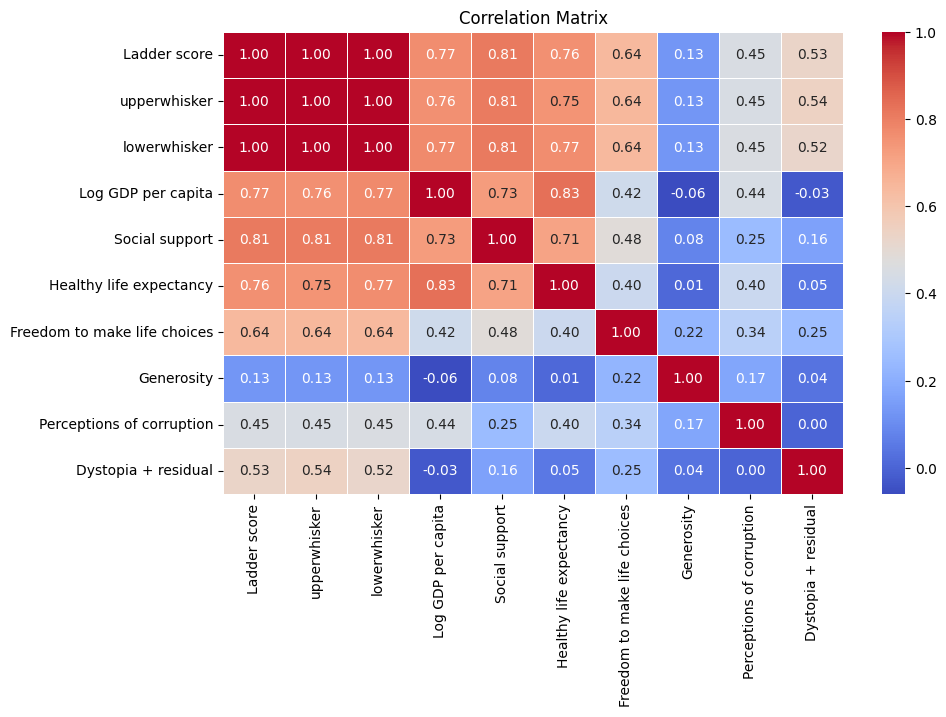

In [11]:
# Step 5: Visualizing correlations
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We generate a correlation heatmap to observe relationships between numerical features and identify strong predictors for the target variable (Happiness Score).


In [12]:
# Step 6: Simple Linear Regression (e.g., predicting Happiness Score using GDP per Capita)
# Step 6a: Prepare the data for Simple Linear Regression
X_simple = df[['Log GDP per capita']]  # Feature (Log GDP per capita)
y = df['Ladder score']  # Target variable (Happiness Score)

In [13]:
# Step 6b: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [14]:
# Step 6c: Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Step 6d: Predict on the test data
y_pred = model.predict(X_test)

In [16]:
# Step 6e: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.5304262162538191
Mean Squared Error (MSE): 0.629559167635023
R² Score: 0.4363677817534669


We build a simple linear regression model using 'Log GDP per capita' as the single predictor to estimate the 'Ladder score' (Happiness Score).


In [18]:
# Step 7: Multiple Linear Regression (Using multiple features)
# Features: Log GDP per capita, Social Support, Healthy Life Expectancy, Freedom to make life choices
X_multiple = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]


In [19]:
# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


In [20]:
# Initialize the model
multiple_regressor = LinearRegression()


In [21]:
# Fit the model on training data
multiple_regressor.fit(X_train_multi, y_train_multi)

LinearRegression()

In [22]:
# Make predictions
y_pred_multi = multiple_regressor.predict(X_test_multi)


In [23]:
# Model Evaluation for Multiple Regression
print("\nMultiple Linear Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test_multi, y_pred_multi)}")
print(f"MSE: {mean_squared_error(y_test_multi, y_pred_multi)}")
print(f"R² Score: {r2_score(y_test_multi, y_pred_multi)}")




Multiple Linear Regression Evaluation:
MAE: 0.3410200318536837
MSE: 0.2030462012946183
R² Score: 0.8182166399512039


We build a multiple linear regression model using multiple features ('Log GDP per capita', 'Social support', 'Healthy life expectancy', and 'Freedom to make life choices') to predict the Happiness Score.


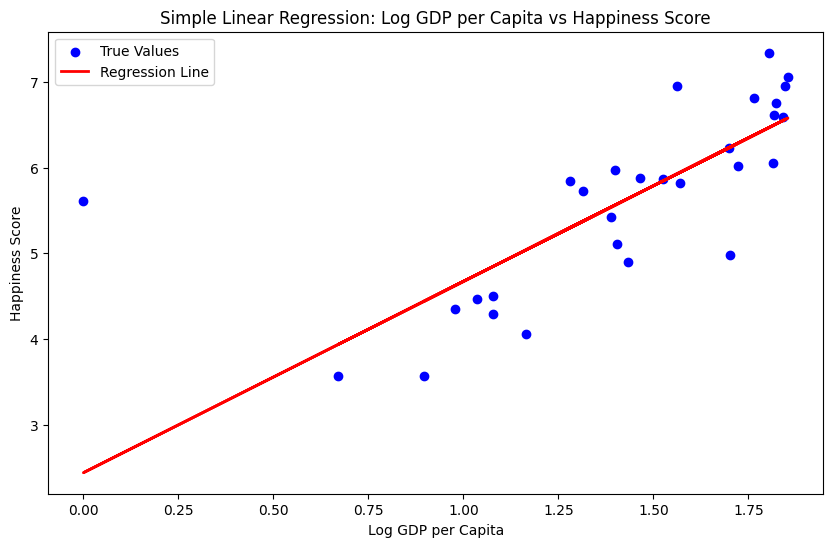

In [24]:
# Step 8: Plotting the regression line (for simple regression)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Simple Linear Regression: Log GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()

We visualize the simple linear regression line over the test data to assess the model's fit.


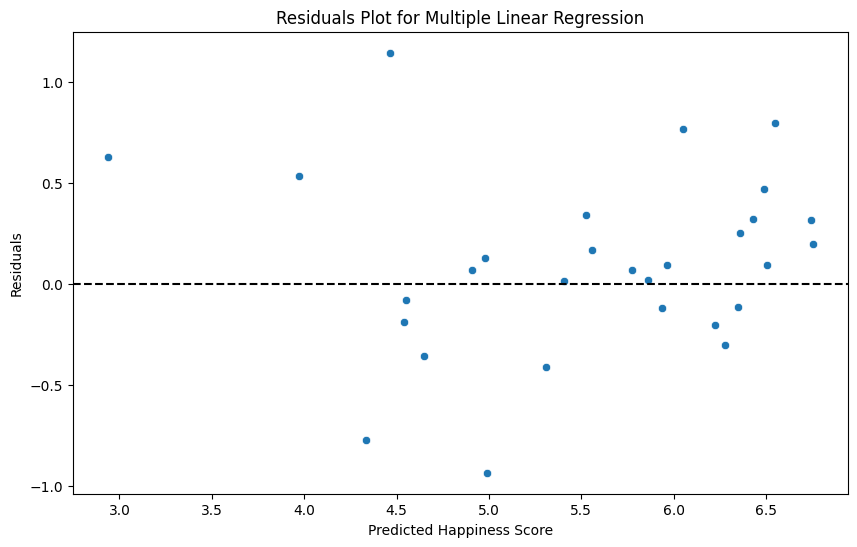

In [25]:
# Step 9: Residuals Plot (for multiple regression)
residuals = y_test_multi - y_pred_multi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Plot for Multiple Linear Regression")
plt.xlabel("Predicted Happiness Score")
plt.ylabel("Residuals")
plt.show()

We plot residuals (actual - predicted values) to check for patterns or biases left in the model. Ideally, residuals should be randomly scattered around zero.


In [31]:
# Step 10: Predicting Happiness Score for user-provided input
def predict_happiness(gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_choices):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'Log GDP per capita': [gdp_per_capita],  # Correct the column name to match the training phase
        'Social support': [social_support],
        'Healthy life expectancy': [healthy_life_expectancy],
        'Freedom to make life choices': [freedom_to_make_choices]
    })

    # Make prediction
    predicted_score = multiple_regressor.predict(input_data)
    return predicted_score[0]

# User inputs
gdp_per_capita = float(input("Enter Log GDP per Capita: "))  # User enters Log GDP per Capita
social_support = float(input("Enter Social Support: "))
healthy_life_expectancy = float(input("Enter Healthy Life Expectancy: "))
freedom_to_make_choices = float(input("Enter Freedom to Make Life Choices: "))

# Get the prediction
predicted_score = predict_happiness(gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_choices)

# Print the result
print(f"Predicted Happiness Score: {predicted_score}")


Enter Log GDP per Capita: 1.5
Enter Social Support: 1
Enter Healthy Life Expectancy: 0.72
Enter Freedom to Make Life Choices: 1
Predicted Happiness Score: 6.51496127274401


You can manually enter values to predict the Happiness Score using our trained model

# Additional Analysis and Visualizations


## Distribution of Happiness Score


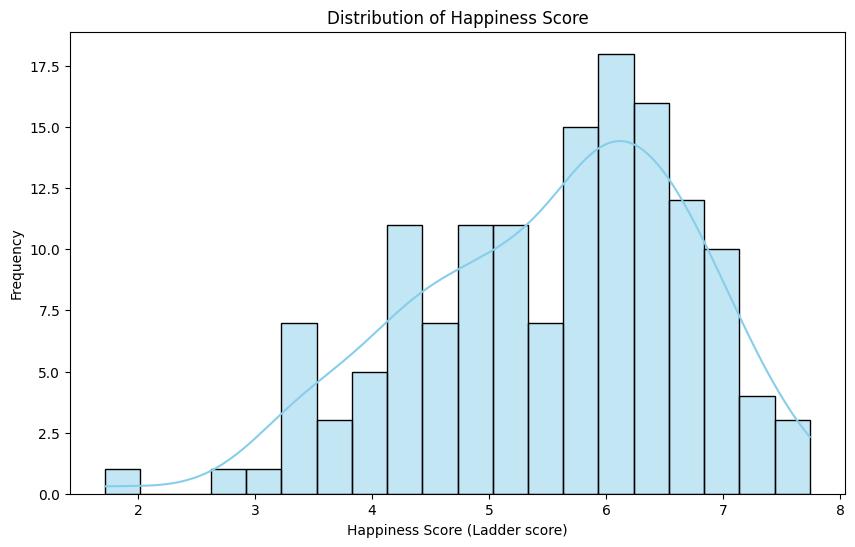

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ladder score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score (Ladder score)')
plt.ylabel('Frequency')
plt.show()


## Scatter Plots: Feature vs Happiness Score


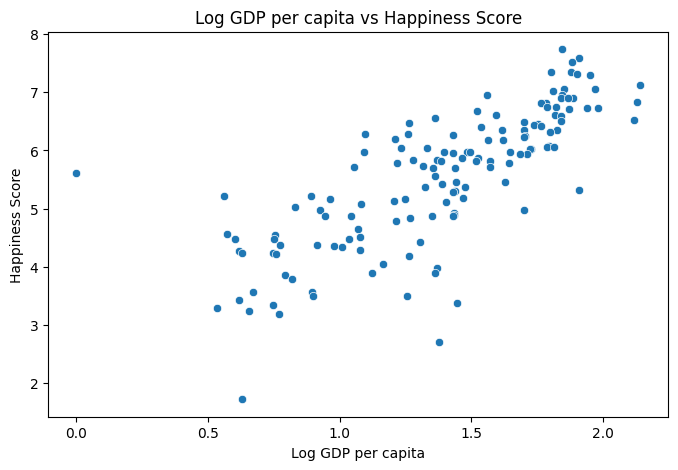

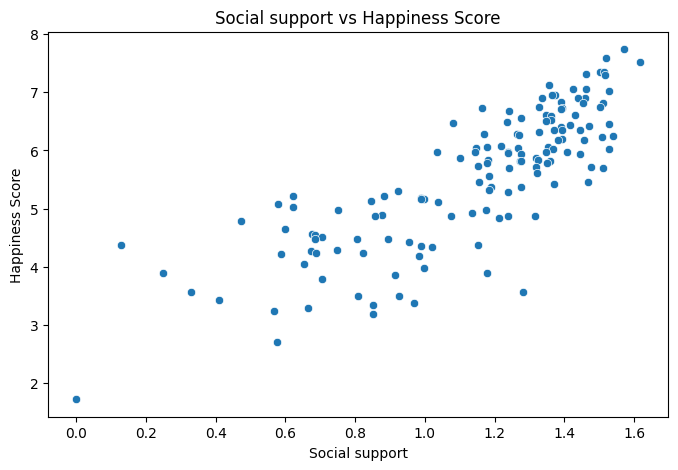

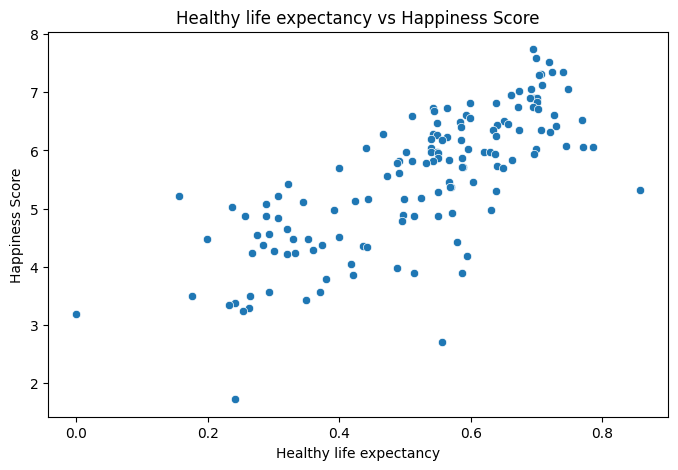

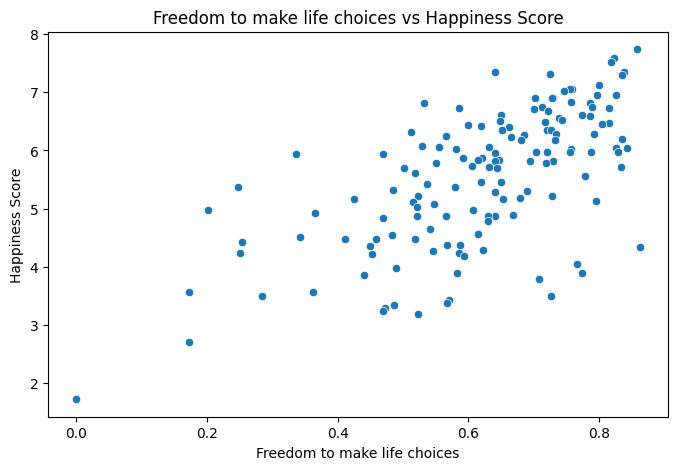

In [27]:
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['Ladder score'])
    plt.title(f'{feature} vs Happiness Score')
    plt.xlabel(feature)
    plt.ylabel('Happiness Score')
    plt.show()


## Pairplot of Important Features


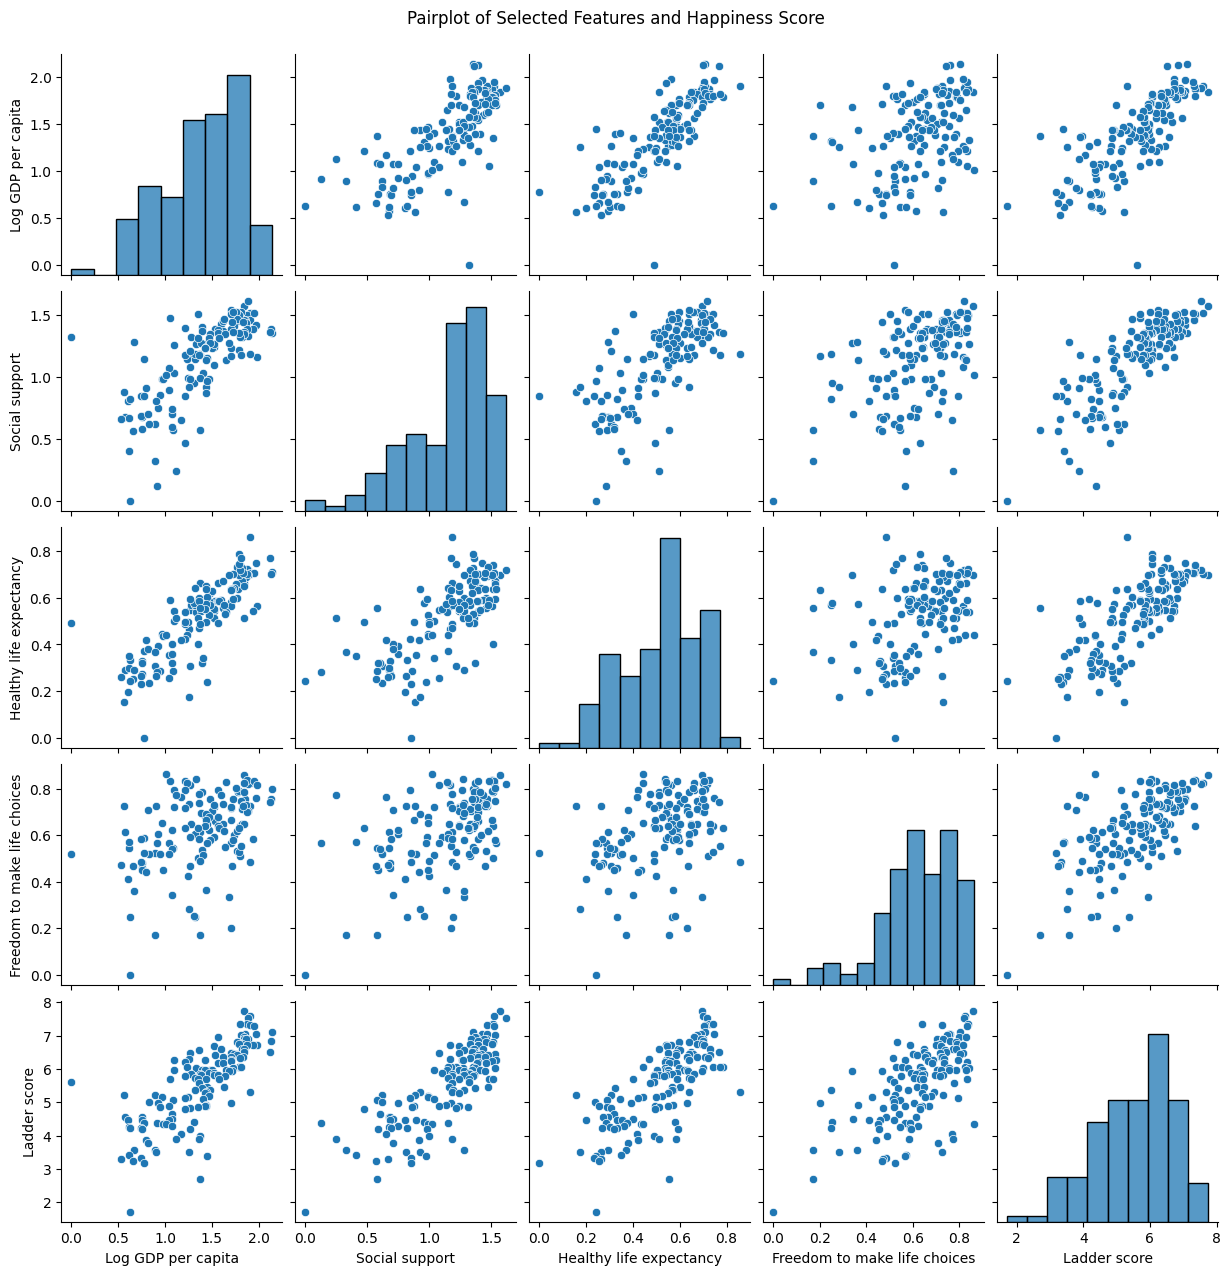

In [28]:
sns.pairplot(df[['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Ladder score']])
plt.suptitle('Pairplot of Selected Features and Happiness Score', y=1.02)
plt.show()


# Conclusion

In this project, we analyzed the World Happiness Report 2024 dataset to understand the factors influencing a country's happiness score.

We started with exploratory data analysis to inspect and visualize the dataset, followed by simple and multiple linear regression models. Our simple regression using "Log GDP per capita" showed a positive relationship with happiness score, while the multiple regression model, incorporating social support, healthy life expectancy, and freedom to make life choices, gave a more comprehensive understanding.

From the model evaluations, we observed that multiple features predict happiness more accurately than a single feature. The residual analysis indicated a fairly good fit, though some variance remains unexplained — suggesting there are additional factors beyond those included.

Overall, GDP, social support, life expectancy, and freedom emerged as significant contributors to national happiness.

Future work could include trying other machine learning models (like Random Forest, XGBoost) or exploring clustering techniques to group countries by similar happiness profiles.
